In [1]:
#KMeans追求的是，求解能够让Inertia最小化的质心
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [10]:
x,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=42)

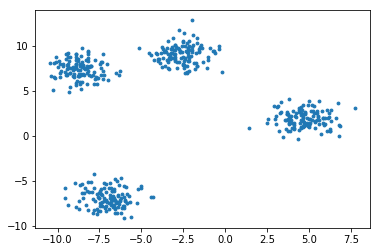

In [11]:
fig,ax1 = plt.subplots(1)
ax1.scatter(x[:,0],x[:,1],
           marker='o',
           s=8,)

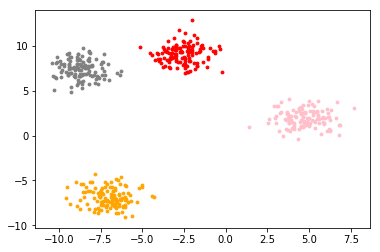

In [13]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(x[y==i, 0], x[y==i, 1]
           ,marker='o' #点的形状
           ,s=8 #点的大小
           ,c=color[i]
           )
plt.show()


In [14]:
from sklearn.cluster import KMeans

In [28]:
n_clusters =4
cluster = KMeans(n_clusters=n_clusters,random_state=42).fit(x)

In [29]:
s1=cluster.labels_
s2=KMeans(n_clusters=n_clusters,random_state=42).fit_predict(x)

In [30]:
(s1 == s2).sum()
centroid = cluster.cluster_centers_
centroid

array([[-8.68153751,  7.4554521 ],
       [-7.0009649 , -6.90445754],
       [ 4.72182456,  1.9238556 ],
       [-2.60221541,  9.09243505]])

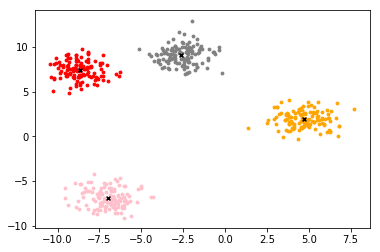

In [31]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(n_clusters):
    ax1.scatter(x[s1==i, 0], x[s1==i, 1]
           ,marker='o'
           ,s=8
           ,c=color[i]
           )
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=15
           ,c="black")
plt.show()


In [32]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [36]:
silhouette_score(x,y_pred)

0.7613478432173022

In [39]:
silhouette_score(x,cluster.labels_)

0.7911042588289479

In [40]:
silhouette_samples(x,y_pred)

array([0.71983954, 0.82364642, 0.83034641, 0.59147531, 0.87242935,
       0.88484432, 0.71917909, 0.91107852, 0.85921358, 0.90990953,
       0.86316065, 0.46559267, 0.8024297 , 0.57426139, 0.81690566,
       0.84010831, 0.62505935, 0.68969588, 0.74190855, 0.65255961,
       0.82150655, 0.49795433, 0.89182893, 0.73640692, 0.7179535 ,
       0.90794114, 0.86179796, 0.74849526, 0.74565143, 0.53931674,
       0.91283601, 0.55015279, 0.67037092, 0.69331344, 0.90601832,
       0.90505849, 0.86907796, 0.81474784, 0.74032063, 0.73655959,
       0.9014139 , 0.87519108, 0.64026775, 0.507374  , 0.39599569,
       0.86097632, 0.89759783, 0.87386624, 0.90743906, 0.71559435,
       0.8567497 , 0.63197276, 0.70637048, 0.89952943, 0.80808357,
       0.68199875, 0.59937811, 0.73494339, 0.89401038, 0.62638872,
       0.72506007, 0.58198067, 0.90924177, 0.71470105, 0.86259364,
       0.83352509, 0.86332032, 0.55311564, 0.89887326, 0.90636079,
       0.84933996, 0.89176569, 0.86940731, 0.70501154, 0.66963

In [45]:
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

In [48]:
contingency_matrix(y,y_pred)

array([[125,   0,   0],
       [  0,   0, 125],
       [  0, 125,   0],
       [125,   0,   0]])

In [51]:
x.shape
y.shape

(500,)

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

For n_clusters = 4 The average silhouette_score is : 0.7911042588289479


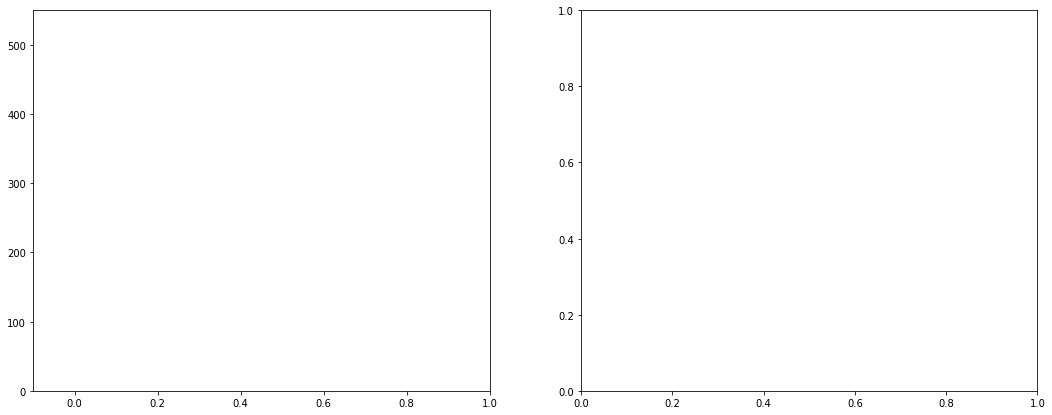

In [56]:
n_clusters = 4
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)
ax1.set_xlim([-0.1,1])
ax1.set_ylim([0,x.shape[0] + (n_clusters + 1) * 10])
cluster = KMeans(n_clusters=n_clusters,random_state=42).fit(x)
cluster_labels = cluster.labels_

silhouette_avg = silhouette_score(x,cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(x, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    i_th_cluster_silhouette_values = sample_silhouette_values[cluster_labels ==i]
    i_th_cluster_silhouette_values.sort()
    size_cluster_i = i_th_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                     ,ith_cluster_silhouette_values
                     ,facecolor=color
                     ,alpha=0.7
                     )
     ax1.text(-0.05
             , y_lower + 0.5 * size_cluster_i
             , str(i))
    y_lower = y_upper + 10
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1]
           ,marker='o'
           ,s=8
           ,c=colors
           )
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
            c="red", alpha=1, s=200)
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.5955207405315346


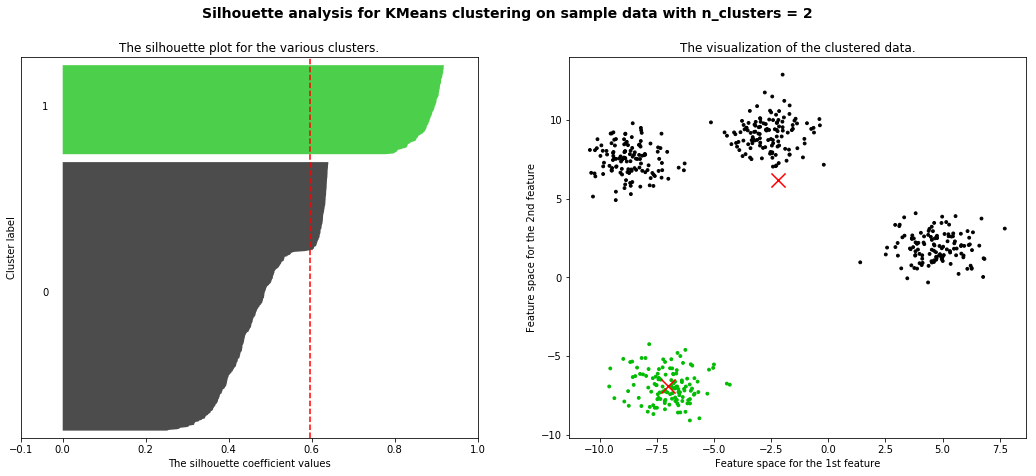

For n_clusters = 3 The average silhouette_score is : 0.7613478432173022


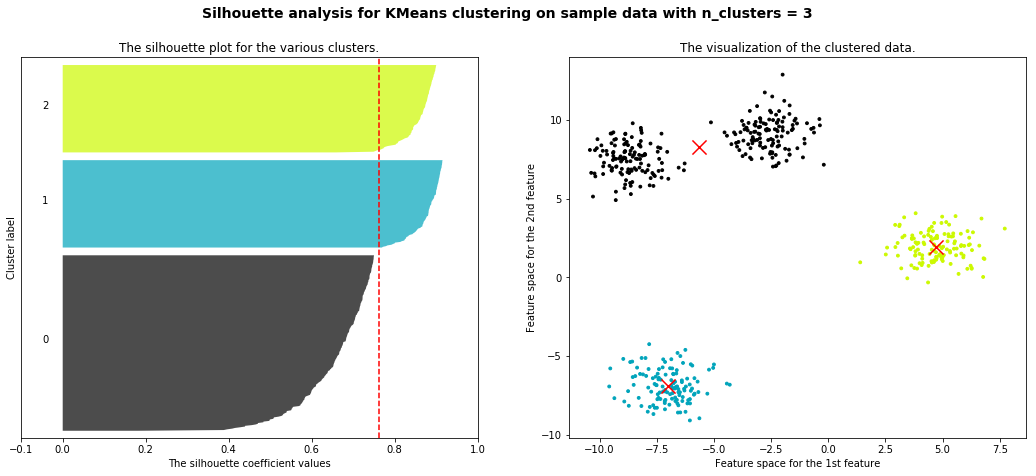

For n_clusters = 4 The average silhouette_score is : 0.7911042588289479


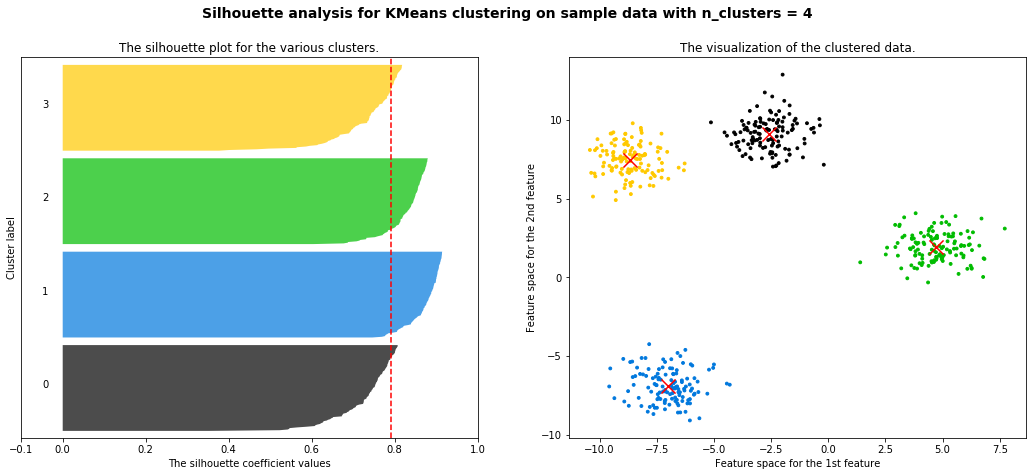

For n_clusters = 5 The average silhouette_score is : 0.6645017489111895


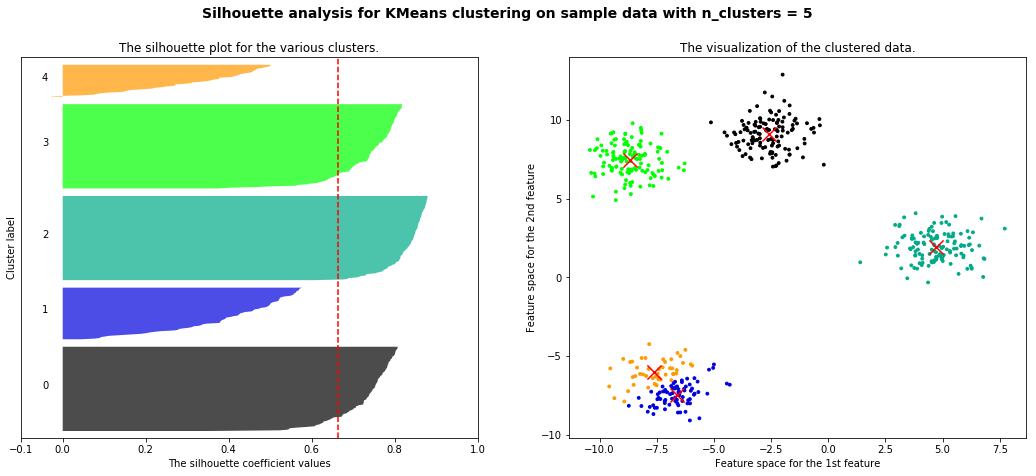

For n_clusters = 6 The average silhouette_score is : 0.5380092827198506


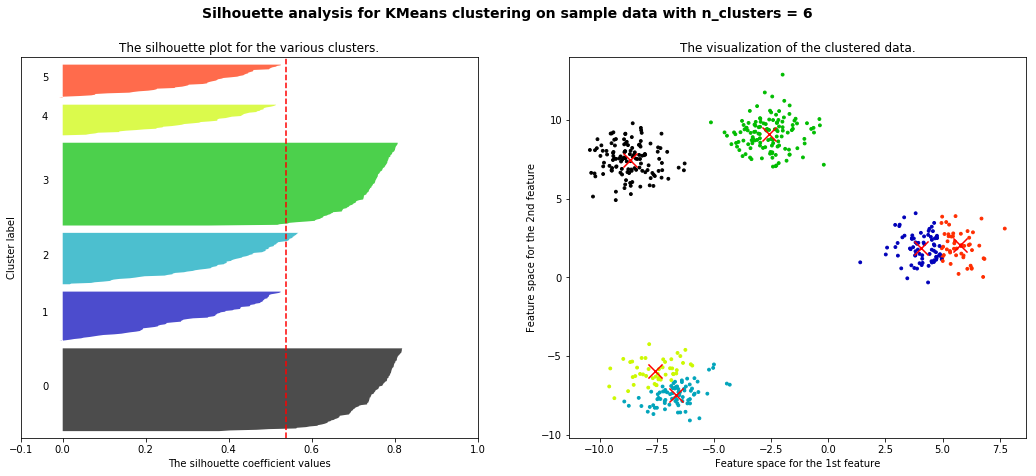

For n_clusters = 7 The average silhouette_score is : 0.4425184395601829


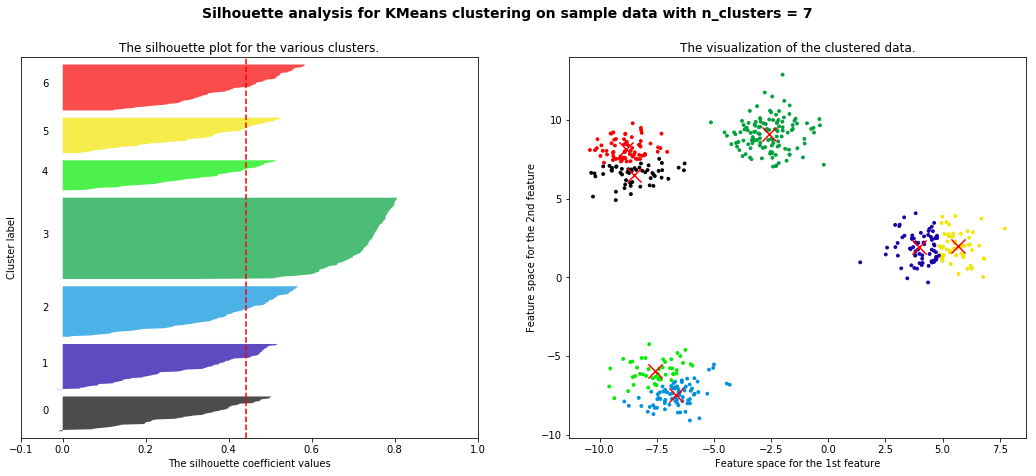

In [72]:
for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, x.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(x)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                         ,ith_cluster_silhouette_values
                         ,facecolor=color
                         ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1]
               ,marker='o'
               ,s=8
               ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [73]:
plus = KMeans(n_clusters = 10).fit(x)
plus.n_iter_

9

In [75]:
random = KMeans(n_clusters = 10,init="random",random_state=420).fit(x)
random.n_iter_

9

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [77]:
china = load_sample_image("china.jpg")
china
china.dtype

dtype('uint8')

In [78]:
china.shape

(427, 640, 3)

In [79]:
newimage = china.reshape((427 * 640,3))

In [81]:
newimage.shape

(273280, 3)

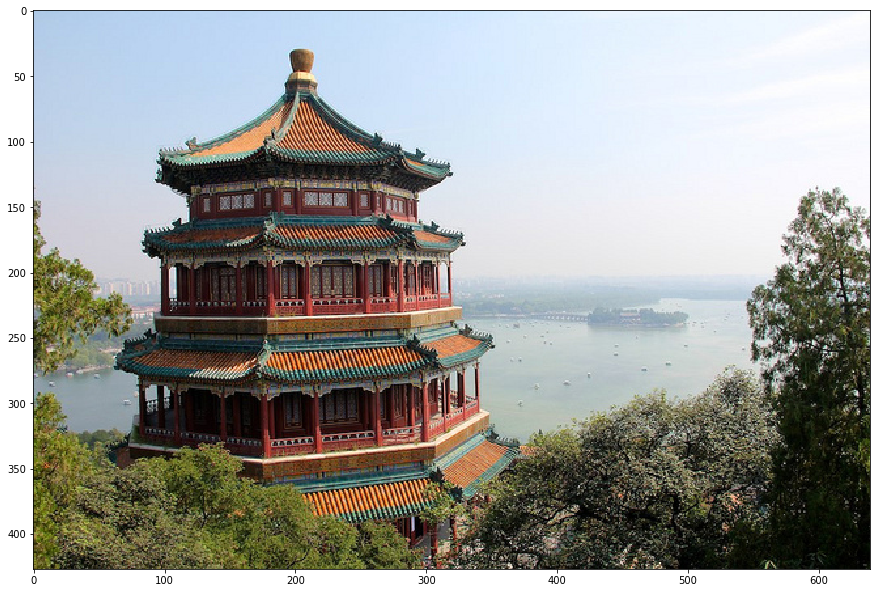

In [82]:
plt.figure(figsize=(15,15))
plt.imshow(china)


In [83]:
china.max()

255

In [85]:
n_clusters = 64
china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))
china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape)

assert d == 3

In [94]:
 w*h*d == w*(h/2)*2*d

True

In [96]:
d=6
image_array = np.reshape(china, (w * (h//2), d))

In [98]:
assert d == 3,'Wrong number'

AssertionError: Wrong number